# Урок 10. Дисперсионный анализ

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

***
## Задание 1.

### Есть ли различие между процентным содержанием изотопов плутония? Используйте функции в Python. Провести предварительный разведочный анализ (проверку на нормальность и равенство дисперсий).

In [2]:
df = pd.DataFrame({'pu238': [0.126, 0.133, 0.127, 0.156, 0.503, 0.113, 0.129, 0.124, 1.022, 1.412, 1.533, 1.534, 1.437, 1.439,
                             1.375, 1.153, 0.201, 0.176, 0.239, 0.102, 1.070, 0.851, 0.125, 0.142, 0.352, 0.351, 0.346, 0.217,
                             1.068, 1.171, 1.213, 1.226, 1.111, 0.183, 0.162, 0.113, 1.309, 1.638, 1.589, 1.411, 1.457, 0.397,
                             0.328, 0.242, 1.367],
                   'pu239': [75.804, 75.515, 75.175, 78.872, 73.317, 79.116, 75.751, 75.326, 63.287, 59.553, 58.688, 58.758, 
                             59.728, 59.544, 59.877, 61.182, 78.244, 78.166, 74.254, 79.840, 62.455, 73.189, 75.968, 75.957,
                             72.885,72.907, 72.919, 76.089, 70.129, 69.273, 69.147, 68.294, 71.076, 75.714, 76.150, 77.845,
                             62.382, 60.112, 60.519, 61.585, 61.332, 72.291, 73.451, 74.888, 60.507],
                   'pu240': [21.204, 21.408, 21.668, 18.428, 20.223, 18.548, 21.162, 21.557, 24.493, 25.576, 25.719, 25.692,
                             25.146, 25.126, 25.128, 25.100, 18.488, 18.629, 21.515, 17.872, 24.656, 18.285, 20.794, 20.867,
                             21.718, 21.721, 21.713, 20.225, 18.573, 18.633, 18.640, 18.869, 18.122, 20.750, 20.345, 19.108,
                             22.754, 23.320, 23.128, 23.133, 23.239, 21.761, 21.429, 20.939, 23.603],
                   'pu241': [2.180, 2.240, 2.305, 1.906, 4.128, 1.690, 2.260, 2.282, 6.990, 8.027, 8.279, 8.261, 8.377, 8.569,
                             8.428, 7.802, 2.351, 2.365, 2.901, 1.674, 7.512, 5.597, 2.407, 2.341, 3.618, 3.601, 3.600, 2.556,
                             7.689, 8.300, 8.363, 8.826, 7.248, 2.488, 2.524, 2.275, 9.311, 9.972, 9.970, 9.339, 9.321, 3.836,
                             3.419, 2.875, 9.839]
                  })
df

,pu238,pu239,pu240,pu241
0,0.126,75.804,21.204,2.180
1,0.133,75.515,21.408,2.240
2,0.127,75.175,21.668,2.305
3,0.156,78.872,18.428,1.906
4,0.503,73.317,20.223,4.128
5,0.113,79.116,18.548,1.690
6,0.129,75.751,21.162,2.260
7,0.124,75.326,21.557,2.282
8,1.022,63.287,24.493,6.990
9,1.412,59.553,25.576,8.027


In [3]:
cols = df.columns.to_list()
cols

['pu238', 'pu239', 'pu240', 'pu241']

In [4]:
for col in cols:
    print(f'{col}: {stats.shapiro(df[col])}')

pu238: ShapiroResult(statistic=0.8199635744094849, pvalue=6.733238933520624e-06)
pu239: ShapiroResult(statistic=0.8647032380104065, pvalue=8.951310883276165e-05)
pu240: ShapiroResult(statistic=0.9316781759262085, pvalue=0.010755813680589199)
pu241: ShapiroResult(statistic=0.8336212635040283, pvalue=1.4246789760363754e-05)


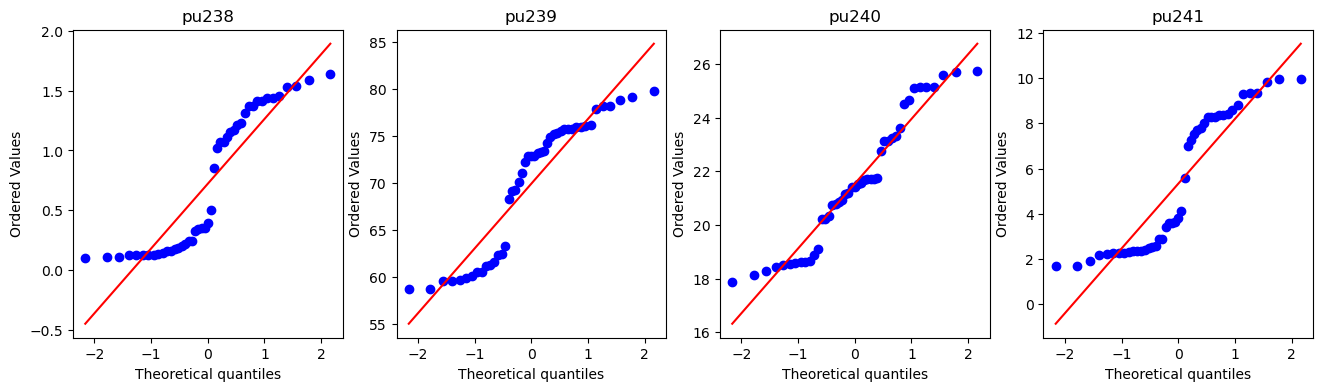

In [5]:
plt.figure(figsize = [4*4, 4])

for i,col in enumerate(cols, 1):
    plt.subplot(1, 4, i)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'{col}')

Т.к. не соблюдаются условия применимости ANOVA, используем непараметрический тест (критерий Крускала–Уоллиса).

In [7]:
stats.kruskal(df['pu238'], df['pu239'], df['pu240'], df['pu241'])

KruskalResult(statistic=167.8178522154513, pvalue=3.76478949748032e-36)

***
## Задание 2.

### Даны квартальные прибыли акции Johnson&Johnson с 1960-1980 гг.

### 2.1 Провести EDA (проверка на нормальность, проверка на однородность дисперсий с помощью Барлетт теста).

In [8]:
df = pd.DataFrame({
    'jj1': [0.71, 0.63, 0.85, 0.44, 0.61, 0.69, 0.92, 0.55, 0.72, 0.77, 0.92, 0.60, 0.83, 0.80, 1.00, 0.77, 0.92, 1.00, 1.24, 1.00, 1.16],
    'jj2': [1.30, 1.45, 1.25, 1.26, 1.38, 1.86, 1.56, 1.53, 1.59, 1.83, 1.86, 1.53, 2.07, 2.34, 2.25, 2.16, 2.43, 2.70, 2.25, 2.79, 3.42],
    'jj3': [3.69, 3.60, 3.60, 4.32, 4.32, 4.05, 4.86, 5.04, 5.04, 4.41, 5.58, 5.85, 6.57, 5.31, 6.03, 6.39, 6.93, 5.85, 6.93, 7.74, 7.83],
    'jj4': [6.12, 7.74, 8.91, 8.28, 6.84, 9.54, 10.26, 9.54, 8.73, 11.88, 12.06, 12.15, 8.91, 14.04, 12.96, 14.85, 9.99, 16.20, 14.67, 16.02, 11.61]
})

In [9]:
cols = df.columns.to_list()
cols

['jj1', 'jj2', 'jj3', 'jj4']

In [10]:
for col in cols:
    print(f'{col}: {stats.shapiro(df[col])}')

jj1: ShapiroResult(statistic=0.9837694764137268, pvalue=0.9688350558280945)
jj2: ShapiroResult(statistic=0.9252575635910034, pvalue=0.11057926714420319)
jj3: ShapiroResult(statistic=0.9523218274116516, pvalue=0.37654614448547363)
jj4: ShapiroResult(statistic=0.9590807557106018, pvalue=0.49780404567718506)


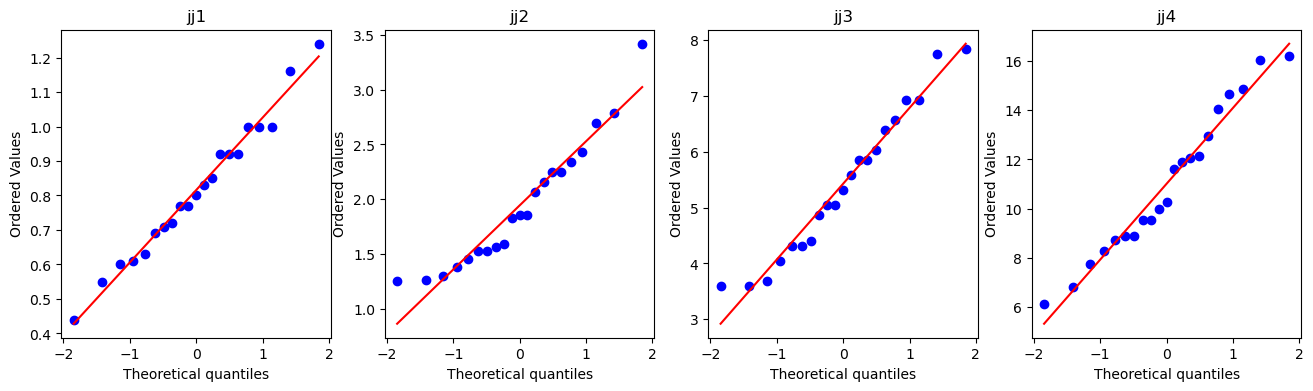

In [11]:
plt.figure(figsize = [4*4, 4])

for i,col in enumerate(cols, 1):
    plt.subplot(1, 4, i)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'{col}')

In [12]:
# проверка на однородность дисперсий
stats.bartlett(df['jj1'], df['jj2'], df['jj3'], df['jj4'])

BartlettResult(statistic=109.62893110687122, pvalue=1.3188378332498206e-23)

### 2.2 Есть ли различия прибыли между 4-мя кварталами?

In [13]:
stats.f_oneway(df['jj1'], df['jj2'], df['jj3'], df['jj4'])

F_onewayResult(statistic=162.03157448390618, pvalue=6.81307443530621e-34)

### 2.3 Провести post hoc tests. Между какими группами не обнаружено статистически значимых различий?

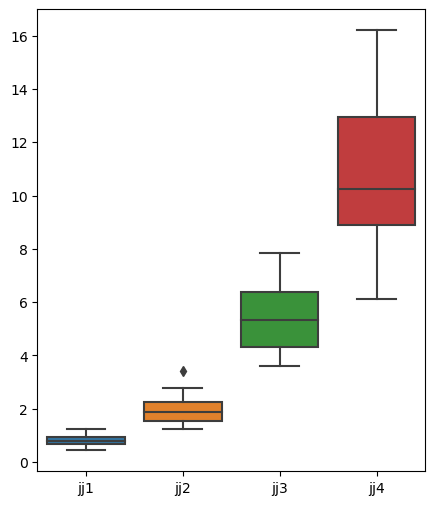

In [14]:
plt.figure(figsize=(5, 6))

sns.boxplot(data=[df['jj1'], df['jj2'], df['jj3'], df['jj4']]);

plt.xticks([0, 1, 2, 3], ['jj1', 'jj2', 'jj3', 'jj4']);

In [15]:
n = df.shape[0]
data = pd.DataFrame({'score': np.hstack([df['jj1'], df['jj2'], df['jj3'], df['jj4']]),
                     'group': np.repeat(['jj1', 'jj2', 'jj3', 'jj4'], repeats=n)})
data

,score,group
0,0.71,jj1
1,0.63,jj1
2,0.85,jj1
3,0.44,jj1
4,0.61,jj1
...,...,...
79,9.99,jj4
80,16.20,jj4
81,14.67,jj4
82,16.02,jj4


In [16]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=data['score'],
                          groups=data['group'],
                          alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   jj1    jj2   1.1276 0.1282 -0.2087   2.464  False
   jj1    jj3     4.61    0.0  3.2737  5.9463   True
   jj1    jj4  10.1986    0.0  8.8622 11.5349   True
   jj2    jj3   3.4824    0.0   2.146  4.8187   True
   jj2    jj4    9.071    0.0  7.7346 10.4073   True
   jj3    jj4   5.5886    0.0  4.2522  6.9249   True
----------------------------------------------------


Между 1м и 2м кварталом статистически значимых различий не обнаружено.

***
## Задание 3.

### Даны веса пациентов до и после диеты. Веса распределены нормально.

In [17]:
df = pd.DataFrame({'X': [92.8 , 95.6, 92.1, 100.6, 96.2, 92.1, 96.7, 97.6, 97.0, 93.9],
                   'Y': [87.1, 84.1, 81.3, 77.0, 86.0, 82.9, 83.0, 85.5, 85.2, 84.6]})
df

,X,Y
0,92.8,87.1
1,95.6,84.1
2,92.1,81.3
3,100.6,77.0
4,96.2,86.0
5,92.1,82.9
6,96.7,83.0
7,97.6,85.5
8,97.0,85.2
9,93.9,84.6


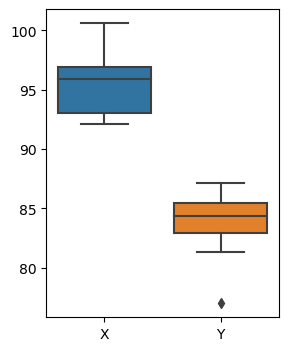

In [18]:
plt.figure(figsize=(3, 4))

sns.boxplot(data=[df['X'], df['Y']]);

plt.xticks([0, 1], ['X', 'Y']);

### Проверить гипотезу о, том что средний вес пациентов после диеты статистически меньше веса до диеты.

Речь идет о случайной величине $\bar{D}=\bar{x}-\bar{y}$ – случайной разнице между случайными значениями $\bar{x}$ и $\bar{y}$ выборочных средних.

Проверяем гипотезу о том, что генеральная средняя (матожидание) этой разницы равна нулю $H_0: M(\bar{D})=0$ против $H_1: M(\bar{D})>0$ (правосторонняя).

In [19]:
Mx, My = df['X'].mean(), df['Y'].mean()
Mx, My

(95.46000000000001, 83.67)

In [20]:
alpha = 0.05
n, m = df['X'].count(), df['Y'].count()
n, m

(10, 10)

In [21]:
from scipy.stats import t

k = n + m - 2
Tk = t.ppf(1-alpha, k)
Tk

1.7340636066175354

In [22]:
d = df['X'] - df['Y']
Md = np.sum(d)/n
Sd = np.sqrt((np.sum(d**2) - np.sum(d)**2/n) / (n-1))

Tn = Md * np.sqrt(n) / Sd
Tn

7.972831441034034

In [23]:
print(f'H0: M(D)=0 is {Tn<Tk}')

H0: M(D)=0 is False


In [24]:
# H1: M(X) <> M(Y)
Tn, p_value = stats.ttest_rel(df['X'], df['Y'], alternative='two-sided') # по умолчанию
Tn, p_value

(7.972831441034037, 2.2744427446816035e-05)

In [25]:
print(f'H0: M(D)=0 is {p_value > alpha}')

H0: M(D)=0 is False


**Т.к. $p-value < \alpha$, то гипотезу $H_0: M(\bar{D})=0$ на уровне значимости 0.05 отклоняем в пользу гипотезы о неравенстве стредних.**

In [27]:
# H1: M(X) < M(Y)
Tn, p_value = stats.ttest_rel(df['X'], df['Y'], alternative='less')
Tn, p_value

(7.972831441034037, 0.9999886277862766)

In [28]:
print(f'H0: M(D)=0 is {p_value > alpha}')

H0: M(D)=0 is True


**Т.к. $p-value > \alpha$, то гипотезу $H_0: M(\bar{D})=0$ на уровне значимости 0.05 принимаем, а гипотезу $H_1: M(\bar{D})<0$ отклоняем.**

In [29]:
# H1: M(X) > M(Y)
Tn, p_value = stats.ttest_rel(df['X'], df['Y'], alternative='greater')
Tn, p_value

(7.972831441034037, 1.1372213723408018e-05)

In [30]:
print(f'H0: M(D)=0 is {p_value > alpha}')

H0: M(D)=0 is False


**Т.к. $p-value < \alpha$, то гипотеза $H_0: M(\bar{D})=0$ на уровне значимости 0.05 отклоняем в пользу гипотезы $H_1: M(\bar{D})>0$.**